In [152]:
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA, KernelPCA
from scipy.stats import kurtosis
from sklearn import random_projection
from sklearn.metrics.pairwise import pairwise_distances
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [6]:
data = datasets.load_digits()
n_samples = len(data.images)
X_train, X_test, y_train, y_test = train_test_split(
data.images.reshape((n_samples, -1)), data.target, test_size=0.2, shuffle=True
)

In [153]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

Find Optimal K

In [154]:
k_grid = np.arange(2,20)
loss = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    loss[idx] = kmeans.inertia_

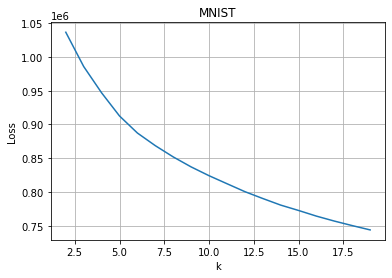

In [155]:
#plot for searching for the best K
plt.figure()
plt.plot(k_grid, loss)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('MNIST')
plt.grid()

In [156]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_test)

KMeans(n_clusters=10)

In [157]:
print('Inertia: ', kmeans.inertia_)
score = silhouette_score(X_test, kmeans.labels_)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, kmeans.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(kmeans.labels_)
print(y_test)

Inertia:  1918625.877351765
Silhouette score:  0.059184555284869225
Adjusted Mutual Information (AMI) score:  0.5006007925710209
[8 5 6 ... 2 7 0]
['0' '4' '1' ... '8' '3' '9']


In [ ]:
The size of K was chosen based on the fact that there are 10 digits starting from 0 to 9.
I did not think that increasing number of clusters would keep contributing to the decrease of inertia, which is the sum of squared distances of samples to their closest cluster center.
So I realized Kmeans cluster does not provide the optimal value for supervised learning since in this case it is obvious more than 10 clusters will only contribute to non realistic result.


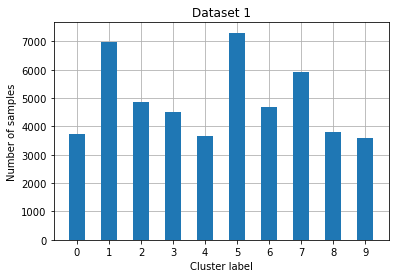

In [158]:
# Dataset 1
plt.figure()
plt.hist(kmeans.labels_, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()


GMM

In [ ]:
k_grid = np.arange(2,20)
bic = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_train)
    bic[idx] = gmm.bic(X_train)

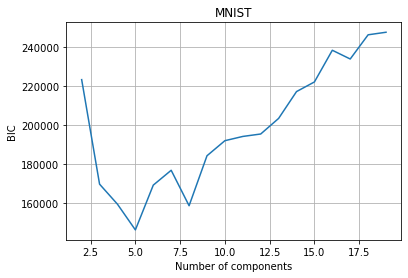

In [25]:
#plot for BIC
plt.figure()
plt.plot(k_grid, bic)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('MNIST')
plt.grid()

In [31]:
# best_n_components = k_grid[np.argmin(bic)]
best_n_components = 10
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(X_train)
gmm_predict = gmm.predict(X_test)


In [35]:
print('BIC: ', gmm.bic(X_test))
score = silhouette_score(X_test, gmm_predict)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, gmm_predict)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(gmm_predict)
print(y_test)

BIC:  149139.40426389
Silhouette score:  0.16061100286171875
Adjusted Mutual Information (AMI) score:  0.7355655087275641
[5 8 8 1 1 2 3 2 3 4 4 4 1 2 3 4 1 1 3 7 2 3 1 6 5 7 8 6 4 9 8 9 2 7 3 4 7
 7 6 9 2 1 5 4 1 8 7 3 6 2 6 6 1 2 7 2 7 6 6 2 8 9 4 5 1 3 5 1 3 6 2 1 2 6
 1 3 5 2 5 9 6 4 7 6 1 1 7 2 7 2 5 5 5 2 7 9 8 1 5 1 9 7 1 2 1 1 8 9 6 1 1
 5 2 7 9 5 2 9 4 6 9 1 7 1 6 7 7 2 9 3 5 6 3 3 7 4 7 9 9 7 7 1 5 2 3 1 4 5
 5 6 2 3 6 7 5 5 5 5 6 1 2 4 4 7 4 4 9 2 2 2 6 1 5 9 5 2 2 8 1 1 2 1 4 1 2
 4 6 5 7 1 2 5 9 3 2 2 2 4 9 2 2 2 8 2 4 1 7 7 8 9 4 4 4 1 2 3 2 8 1 1 2 1
 4 2 9 4 6 1 2 1 2 6 1 5 3 6 6 5 6 2 5 2 3 3 2 4 1 9 8 8 1 2 2 7 1 2 5 5 1
 7 2 1 5 9 4 2 3 4 8 2 9 9 8 2 7 2 4 2 2 2 6 2 3 1 2 9 1 2 6 2 5 5 7 3 2 6
 4 7 6 4 6 1 4 4 2 5 2 6 5 2 4 4 2 8 2 7 5 8 6 5 2 4 5 4 9 4 7 8 4 1 3 5 2
 2 7 9 2 1 6 7 2 3 1 2 6 5 9 2 5 1 1 1 1 3 4 5 3 3 1 2]
[7 1 1 9 1 8 2 1 2 0 0 0 9 8 2 0 9 9 2 6 1 2 3 4 9 6 1 4 0 5 1 5 8 6 2 0 6
 6 4 5 1 5 7 0 3 1 6 2 4 8 4 4 3 3 6 1 6 4 4 8 1 5 0 7 9 1 7 9 2 4 3 3 8

PCA

In [118]:
pca = PCA()
pca.fit(X_train)


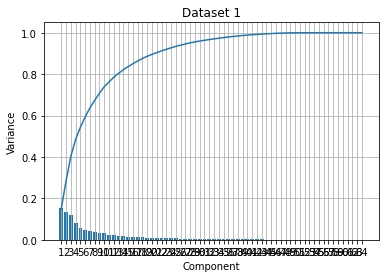

In [ ]:
# pca.explained_variance_ratio_
feature_size = pca.explained_variance_.size
plt.figure()
# plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_)
plt.plot(np.arange(1, feature_size + 1), pca.explained_variance_ratio_.cumsum())
plt.bar(np.arange(1, feature_size + 1), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, feature_size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 1')
plt.grid()


Applying PCA to Kmeans and GMM

In [52]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_test)

best_n_components = 4
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(X_train)
gmm_predict = gmm.predict(X_test)

print('Inertia: ', kmeans.inertia_)
score = silhouette_score(X_test, kmeans.labels_)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, kmeans.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(kmeans.labels_)
print(y_test)

print('BIC: ', gmm.bic(X_test))
score = silhouette_score(X_test, gmm_predict)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, gmm_predict)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(gmm_predict)
print(y_test)

Inertia:  319740.9287465997
Silhouette score:  0.1417726455672331
Adjusted Mutual Information (AMI) score:  0.44949886263389904
[1 1 1 0 2 1 2 1 2 0 0 0 0 2 2 0 0 0 2 3 2 0 0 3 1 3 1 3 0 2 1 2 1 3 2 0 3
 3 3 0 2 0 2 0 0 1 3 2 3 2 3 3 0 0 3 2 3 3 3 2 1 2 0 1 0 2 1 0 2 3 1 0 1 3
 0 2 2 2 1 2 1 0 3 3 0 0 3 1 3 2 1 1 1 1 3 2 1 0 1 0 2 3 0 2 0 0 1 2 3 0 0
 1 1 3 3 1 1 1 0 3 2 1 3 0 3 3 3 1 0 2 1 3 2 2 3 0 3 0 2 3 3 0 1 2 2 0 0 2
 1 3 2 2 3 3 1 1 1 1 3 0 2 3 0 3 0 0 2 1 1 0 3 0 2 2 1 2 2 1 0 0 2 0 0 0 2
 0 3 1 3 0 2 1 2 2 0 1 2 0 0 2 1 2 1 1 0 0 3 3 1 0 0 0 0 0 0 2 2 1 0 0 2 0
 0 2 2 0 3 0 2 0 1 1 0 1 2 3 3 2 3 2 2 0 2 0 1 0 0 0 1 1 0 1 0 3 0 2 1 2 0
 3 2 0 1 2 0 1 2 0 1 2 2 3 1 2 3 0 0 0 2 2 3 2 2 0 1 2 0 2 3 2 2 1 3 2 2 3
 0 3 3 0 3 1 0 0 2 1 2 3 1 1 0 0 1 1 1 3 1 1 3 1 2 0 1 0 1 0 3 1 0 0 2 1 2
 0 3 2 2 0 3 3 2 2 2 2 3 1 2 2 1 0 0 0 0 2 0 1 2 2 0 2]
[7 1 1 9 1 8 2 1 2 0 0 0 9 8 2 0 9 9 2 6 1 2 3 4 9 6 1 4 0 5 1 5 8 6 2 0 6
 6 4 5 1 5 7 0 3 1 6 2 4 8 4 4 3 3 6 1 6 4 4 8 1 5 0 7 9 1 7 9 2 4

ICA

In [64]:
k_grid = np.arange(2,20)

kurt = []
loss = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    ica = FastICA(n_components=k)
    tmp = ica.fit_transform(X_train)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())


/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/minic

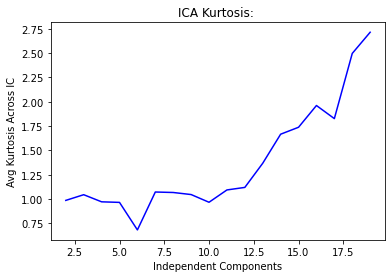

Silhouette score:  0.15511398018914163
Adjusted Mutual Information (AMI) score:  0.5403882110595514
[3 0 0 4 0 3 5 0 5 2 2 2 4 5 5 2 4 4 5 1 5 4 4 0 3 1 0 0 2 5 0 5 3 1 5 2 1
 1 0 4 5 4 5 2 4 0 1 5 0 5 0 0 4 4 1 5 1 3 0 5 0 5 2 3 4 5 3 4 5 0 3 4 0 0
 4 5 5 5 3 5 3 2 1 3 4 4 1 3 1 4 3 3 3 3 1 5 0 4 3 4 5 1 4 5 4 4 0 5 0 4 4
 3 0 1 1 3 0 3 2 0 5 0 1 4 0 1 0 3 4 5 3 0 5 5 1 2 1 4 5 1 1 4 3 5 5 4 2 5
 3 3 5 5 3 1 3 3 3 3 3 4 5 1 2 1 2 2 5 0 5 4 3 4 5 5 3 4 5 0 4 4 3 4 2 4 5
 2 3 3 1 4 5 3 5 5 4 3 5 2 4 5 0 5 0 0 2 4 1 1 0 4 2 2 2 2 4 5 4 0 4 4 5 4
 2 5 5 2 3 4 5 4 4 0 4 0 5 0 3 5 0 4 5 4 5 4 0 2 4 4 0 0 4 3 4 1 4 5 5 5 4
 1 4 4 3 4 2 3 5 2 0 5 5 5 0 5 1 4 2 4 5 5 3 5 5 2 5 5 4 5 0 4 5 3 1 5 5 0
 2 1 0 2 3 3 2 2 5 3 5 0 3 5 2 2 4 0 3 1 3 0 3 3 5 2 3 2 3 2 1 0 2 4 5 3 5
 4 1 5 5 4 3 1 5 5 4 5 0 3 5 5 3 4 4 4 4 5 2 3 5 5 4 5]
[7 1 1 9 1 8 2 1 2 0 0 0 9 8 2 0 9 9 2 6 1 2 3 4 9 6 1 4 0 5 1 5 8 6 2 0 6
 6 4 5 1 5 7 0 3 1 6 2 4 8 4 4 3 3 6 1 6 4 4 8 1 5 0 7 9 1 7 9 2 4 3 3 8 4
 3 2 7 1 9 5 4 0 6 

In [94]:
plt.figure()
plt.title("ICA Kurtosis: ")
plt.xlabel("Independent Components")
plt.ylabel("Avg Kurtosis Across IC")
plt.plot(k_grid, kurt, 'b-')
plt.grid(False)
plt.show()

k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_test)

best_n_components = 6
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(X_train)
gmm_predict = gmm.predict(X_test)

score = silhouette_score(X_test, kmeans.labels_)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, kmeans.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(kmeans.labels_)
print(y_test)

print('BIC: ', gmm.bic(X_test))
score = silhouette_score(X_test, gmm_predict)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, gmm_predict)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(gmm_predict)
print(y_test)

Random Projection
#referred to https://github.com/kylewest520/CS-7641---Machine-Learning/blob/master/Assignment%203%20Unsupervised%20Learning/CS%207641%20HW3%20Code.ipynb
for data conversion of rp

In [76]:
def pairwise_dist_corr(x1, x2):
    assert x1.shape[0] == x2.shape[0]

    d1 = pairwise_distances(x1)
    d2 = pairwise_distances(x2)
    return np.corrcoef(d1.ravel(), d2.ravel())[0, 1]

Silhouette score:  0.15345140156042344
Adjusted Mutual Information (AMI) score:  0.5346480459910186
[2 3 3 1 3 2 0 3 0 5 5 5 1 0 0 5 1 1 0 4 0 1 1 3 2 4 3 3 5 0 3 0 0 4 0 5 4
 4 4 1 0 1 0 5 1 3 4 0 3 0 4 4 1 1 4 0 4 2 3 0 3 0 5 2 1 0 2 1 0 2 0 1 3 3
 1 0 0 0 3 0 2 5 4 2 1 1 4 2 4 0 2 2 2 2 4 0 3 1 2 1 0 4 1 0 1 1 3 0 3 1 1
 2 3 4 4 2 3 2 5 3 0 3 4 1 3 4 3 2 1 0 2 3 0 0 4 5 4 1 0 4 4 1 2 0 0 1 5 0
 2 2 0 0 2 4 2 2 2 2 2 1 0 4 5 4 5 5 0 3 0 1 2 1 0 0 2 1 0 3 1 1 2 1 5 1 0
 5 2 2 4 1 0 2 0 0 1 3 0 5 1 0 3 0 3 3 5 1 4 4 3 1 5 5 5 5 1 0 1 3 1 1 0 1
 5 0 0 5 2 1 0 1 1 3 1 3 0 4 2 0 3 1 0 1 0 1 3 5 1 1 3 3 1 2 1 4 1 0 0 0 1
 4 1 1 2 1 5 2 0 5 3 0 0 0 3 0 4 1 5 1 0 0 2 0 0 1 0 0 1 0 3 1 0 2 4 0 0 3
 5 4 3 5 2 2 5 5 0 2 0 3 2 0 5 5 1 3 2 4 2 3 2 2 0 5 2 5 2 5 4 3 5 1 0 2 0
 1 4 0 0 1 2 4 0 0 1 0 3 2 0 0 2 1 1 1 1 0 5 2 0 0 1 0]
[7 1 1 9 1 8 2 1 2 0 0 0 9 8 2 0 9 9 2 6 1 2 3 4 9 6 1 4 0 5 1 5 8 6 2 0 6
 6 4 5 1 5 7 0 3 1 6 2 4 8 4 4 3 3 6 1 6 4 4 8 1 5 0 7 9 1 7 9 2 4 3 3 8 4
 3 2 7 1 9 5 4 0 6 

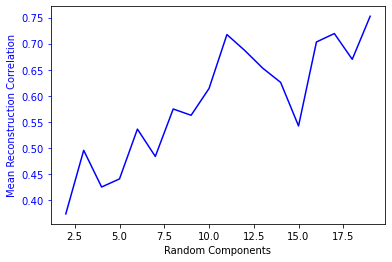

In [93]:
k_grid = np.arange(2,20)

tmp = defaultdict(dict)
for idx, k in enumerate(k_grid):
    rp = random_projection.SparseRandomProjection(n_components=k)
    # tmp = rp.fit_transform(X_train)
    # tmp = pd.DataFrame(tmp).T
    tmp[k][idx] = pairwise_dist_corr(rp.fit_transform(X_train), X_train)

tmp = pd.DataFrame(tmp).T
mean_recon = tmp.mean(axis=1).tolist()
std_recon = tmp.std(axis=1).tolist()

fig, ax1 = plt.subplots()
ax1.plot(k_grid,mean_recon, 'b-')
ax1.set_xlabel('Random Components')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)

# fig, ax2 = plt.subplots()
# ax2.plot(k_grid,std_recon, 'm-')
# ax2.set_ylabel('STD Reconstruction Correlation', color='m')
# ax2.tick_params('y', colors='m')
# plt.grid(False)

k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_test)

best_n_components = 6
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(X_train)
gmm_predict = gmm.predict(X_test)

score = silhouette_score(X_test, kmeans.labels_)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, kmeans.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(kmeans.labels_)
print(y_test)

print('BIC: ', gmm.bic(X_test))
score = silhouette_score(X_test, gmm_predict)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, gmm_predict)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print(gmm_predict)
print(y_test)


KernelPCA

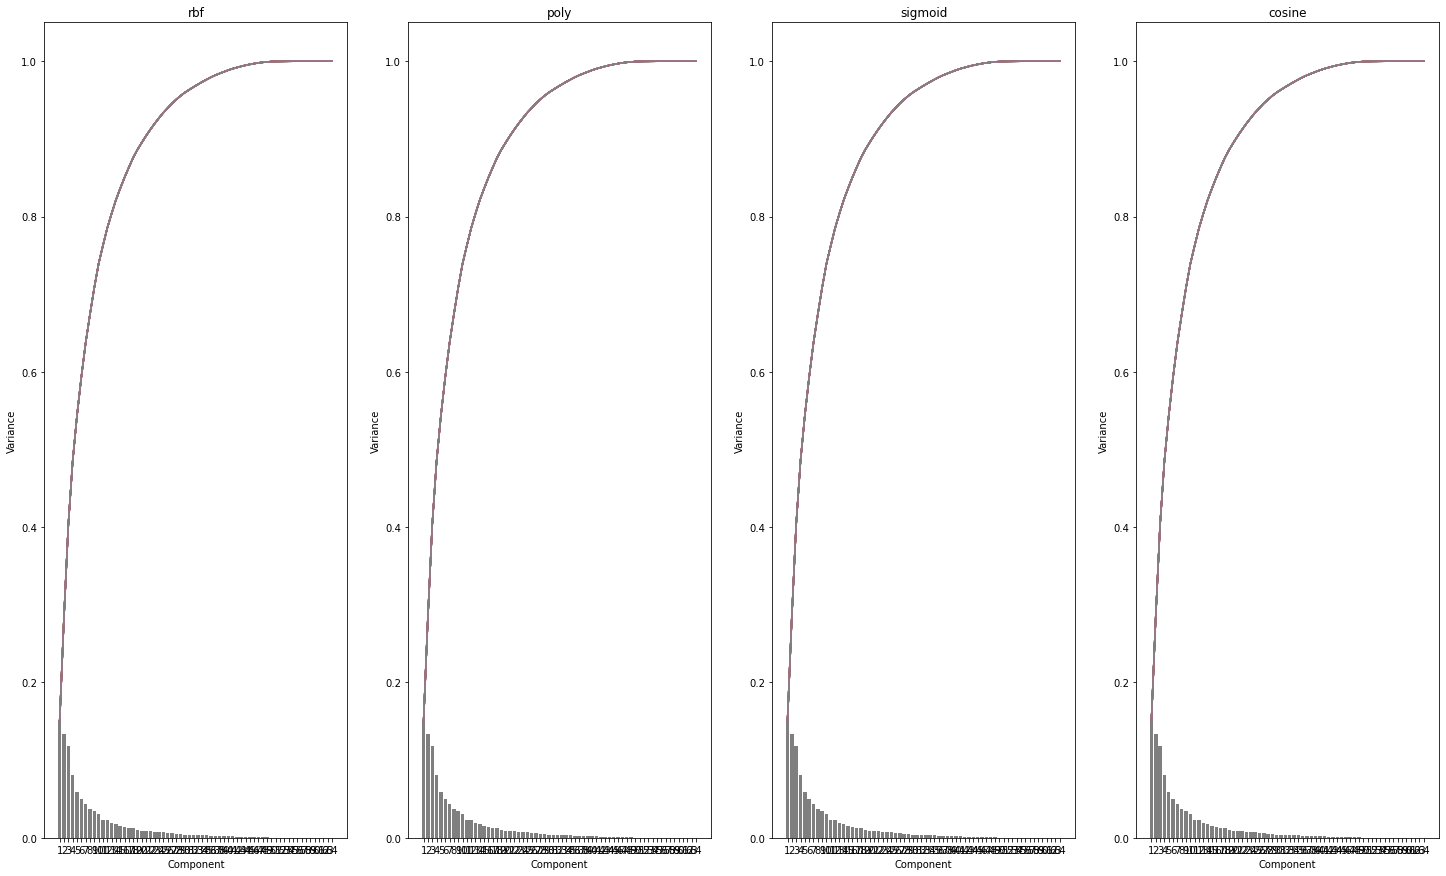

In [115]:

k_grid = np.arange(2,20)
kernels = ['rbf', 'poly', 'sigmoid', 'cosine']
tmp = defaultdict(dict)
plt.figure(figsize=[25,15])
for i, kernel in enumerate(kernels):
    for idx, k in enumerate(k_grid):
        kcpa = KernelPCA(n_components=k, kernel=kernel)
        kcpa.fit(X_train)
        fit = plt.subplot(1,4,i+1)
        feature_size = pca.explained_variance_.size
        plt.plot(np.arange(1, feature_size + 1), pca.explained_variance_ratio_.cumsum())
        plt.bar(np.arange(1, feature_size + 1), pca.explained_variance_ratio_)
        plt.xticks(np.arange(1, feature_size + 1))
        plt.xlabel('Component')
        plt.ylabel('Variance')
        plt.title(kernel)
        # fig.subplots_adjust(bottom=spacing)
        # plt.grid()
# plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_)



In [117]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_test)

best_n_components = 4
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(X_train)
gmm_predict = gmm.predict(X_test)

score = silhouette_score(X_test, kmeans.labels_)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, kmeans.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)


print('BIC: ', gmm.bic(X_test))
score = silhouette_score(X_test, gmm_predict)
print('Silhouette score: ', score)
ami1 = adjusted_mutual_info_score(y_test, gmm_predict)
print('Adjusted Mutual Information (AMI) score: ', ami1)


Silhouette score:  0.1409955192356701
Adjusted Mutual Information (AMI) score:  0.4407338646961845
BIC:  87748.50248556581
Silhouette score:  0.03625654516254583
Adjusted Mutual Information (AMI) score:  0.32377073187525346


Neural Network

In [149]:
transformer = PCA(n_components=6)
X_train_pca = transformer.fit_transform(X_train)
X_test_pca = PCA(n_components=64).fit_transform(X_test)
X_train_ica = FastICA(n_components=64).fit_transform(X_train)
X_test_ica = FastICA(n_components=64).fit_transform(X_test)
# X_train_rp
# X_test_rp
# X_train_kernel
# X_test_kernel

/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [150]:
data = []
data.append((X_train, X_test))
data.append((X_train_pca, X_test_pca))
data.append((X_train_ica, X_test_ica))
nn = MLPClassifier(hidden_layer_sizes=(10,))
print(X_train_pca.shape)
# X_train_pca
print(y_train.shape)
print(X_train.shape)
nn.fit(X_train_pca, y_train)
# for X_train, X_test in data:
#     nn.fit(X_train, y_train)
#     y_pred = nn.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(acc)


(1437, 6)
(360, 64)
(1437, 64)


ValueError: Found input variables with inconsistent numbers of samples: [1437, 360]